# Awesome 4 Panel Project
# Package: tkinter
# GRIB data used

## 1) HDWX 4-Panel 

## 2) Tkinter basics
### This is the package we found with the capability to make the awesome 4-panel.  
### Below are some of the Basics:

### Example 1: How to make a simple single "parent" window.

In [15]:
# this imports the 'tkinter' module
import tkinter
# creates a window
window = tkinter.Tk()
# This gives the window a fancy title
window.title("Hello, Python4Geosciences!!!")

# must make fancy title before this piece of code: (it starts the application)
window.mainloop()

### Example 2: How to make a Label: (Bonus set the size of window)

In [16]:
window = tkinter.Tk()
window.title("Hello, Python4Geosciences!!!")

# This changes the size of the window
window.geometry("300x100")

# Make a label:
tamu = tkinter.Label(window, text='Texas A&M University')
tamu.pack()

# Create second label:
lbl = tkinter.Label(window, text='College of Geosciences')
# pack(add) the widget to the window
lbl.pack()

# must make fancy title before this piece of code: (it starts the application)
window.mainloop()

### Example 3: How to make a entry window: 

In [19]:
window = tkinter.Tk()
window.title("Hello, Python4Geosciences!!!")
window.geometry("300x100")

tamu = tkinter.Label(window, text='Texas A&M University')
tamu.pack()
lbl = tkinter.Label(window, text='College of Geosciences')
lbl.pack()

# text entry window
ent = tkinter.Entry(window)
ent.pack()

window.mainloop()

### Example 4: How to make a button:

In [41]:
def Pressed():
    print('Buttons are cool')
    
window = tkinter.Tk()
window.title("Hello, Python4Geosciences!!!")
window.geometry("300x100")

tamu = tkinter.Label(window, text='Texas A&M University')
tamu.pack()
lbl = tkinter.Label(window, text='College of Geosciences')
lbl.pack()

ent = tkinter.Entry(window)
ent.pack()

# button widget
btn = tkinter.Button(window, text='Click Me!', command = Pressed)
btn.pack()

window.mainloop()

Buttons are cool
Buttons are cool


### Example 5: Importance of placement of name.pack( )

In [26]:
window = tkinter.Tk()
window.title("Hello, Python4Geosciences!!!")
window.geometry("300x100")

tamu = tkinter.Label(window, text='Texas A&M University')
lbl = tkinter.Label(window, text='College of Geosciences')
ent = tkinter.Entry(window)
btn = tkinter.Button(window, text='Click Me!')

# reversed order of pack
btn.pack()
ent.pack()
lbl.pack()
tamu.pack()

window.mainloop()

### Example 6: How to make a "child" window from clicking a button on "parent" root window.

In [12]:
import tkinter as tk
from tkinter import *
from tkinter.ttk import *
from tkinter import PhotoImage

# Function to make child window
def create_window():
    child = tk.Toplevel(root)
    child.geometry("300x100")
    child.title("Child Window")

root = tk.Tk()
root.title("Hello, Python4Geosciences!!!")
root.geometry("300x100")

tamu = tk.Label(root, text='Texas A&M University')
tamu.pack()
lbl = tk.Label(root, text='College of Geosciences')
lbl.pack()

# myimage = PhotoImage(file="CONUSpic.gif")
# w = tk.Label(root, image=photo)
# w.pack()

img = tk.PhotoImage(file = "CONUSpic.gif")
button = tk.Button(root, image=img)
button.image = img
button.grid()
# Command added to button to create the child window
b = tk.Button(root, text="Create new window", command=create_window)
b.pack()

root.mainloop()

# This is definitely not what I recommend as an example of good coding style, but it illustrates the basic concepts: 
#     a button with a command, and a function that creates a window.

TclError: image "pyimage8" doesn't exist

In [13]:
from tkinter import *
canvas = Canvas(width = 300, height = 200, bg = 'yellow')
canvas.pack(expand = YES, fill = BOTH)
gif1 = PhotoImage(file='CONUSpic.gif')
canvas.create_image(50,10,image = gif1, anchor = NW)
mainloop()

## 3) Picked specific dates: November 16 2014
### SPC website to find severe weather day
### Data from NCEP


In [65]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import matplotlib.cm as cm

ncfile = nc.Dataset("20141116T180000Z.ncd")
lat = ncfile['Latitude'][:]
lon = ncfile['Longitude'][:]
# gathering the variables:
gheight = ncfile['Z'][20,:,:]
temp = ncfile['T'][0,:,:]
rh = ncfile['RH'][11,:,:]
vort = ncfile['vor'][15,:,:]

bm = Basemap(projection='lcc',llcrnrlat=13.0, llcrnrlon=230.0, urcrnrlat=50.0, urcrnrlon=320.0, lat_1=20.,lat_2=60,lat_0=40,lon_0
             =260)

## variables:
### Relative Vorticity (s^-1) at 500 hPa

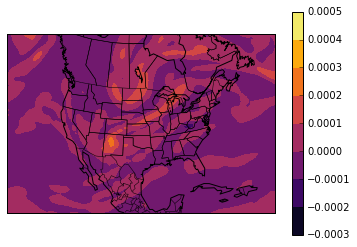

In [85]:
lonall, latall = np.meshgrid(lon,lat)
lonproj, latproj = bm(lonall, latall)
bm.drawcountries()
bm.drawcoastlines()
bm.drawstates()
vortimg = plt.contourf(lonproj, latproj, vort, cmap = cm.inferno)
plt.colorbar(vortimg)
plt.show()

### Relative Humidity (%) at 700 hPa


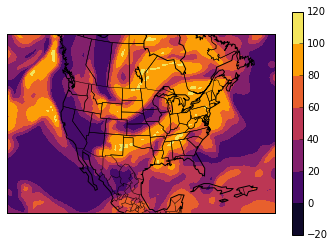

In [84]:
lonall, latall = np.meshgrid(lon,lat)
lonproj, latproj = bm(lonall, latall)
bm.drawcountries()
bm.drawcoastlines()
bm.drawstates()
rhimg = plt.contourf(lonproj, latproj, rh, cmap = cm.inferno)
plt.colorbar(rhimg)
plt.show()

### Temperature (Kelvin) at 1000 hPa


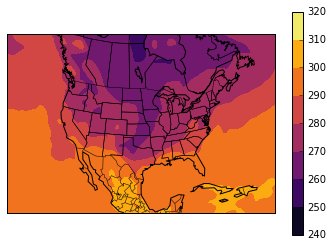

In [78]:
lonall, latall = np.meshgrid(lon,lat)
lonproj, latproj = bm(lonall, latall)
bm.drawcountries()
bm.drawcoastlines()
bm.drawstates()
tempimg = plt.contourf(lonproj, latproj, temp, cmap = cm.inferno)
plt.colorbar(tempimg)
plt.show()

### Geopotential Height (m) at 250 hPa

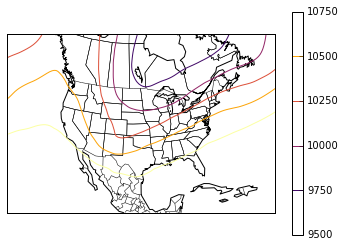

In [83]:
lonall, latall = np.meshgrid(lon,lat)
lonproj, latproj = bm(lonall, latall)
bm.drawcountries()
bm.drawcoastlines()
bm.drawstates()
gheightimg = plt.contour(lonproj, latproj, gheight, cmap = cm.inferno)
plt.colorbar(gheightimg)
plt.show()